
# 자동차 구매 가격 예측



# PROBLEM STATEMENT

다음과 같은 컬럼을 가지고 있는 데이터셋을 읽어서, 어떠한 고객이 있을때, 그 고객이 얼마정도의 차를 구매할 수 있을지를 예측하여, 그 사람에게 맞는 자동차를 보여주려 한다.

- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary
- Credit Card Debt
- Net Worth (순자산)

예측하고자 하는 값 :
- Car Purchase Amount

# STEP #0: 라이브러리 임포트 및 코랩 환경 설정

[구글 드라이브 파일 읽기 참고](https://vision-ai.tistory.com/entry/%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C%EC%9D%98-csv-%ED%8C%8C%EC%9D%BC-%EC%9D%BD%EA%B8%B0)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### csv 파일을 읽기 위해, 구글 드라이브 마운트 하시오

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### working directory 를, 현재의 파일이 속한 폴더로 셋팅하시오.

# STEP #1: IMPORT DATASET

### Car_Purchasing_Data.csv 파일을 사용한다.  코랩의 경우 구글드라이브의 전체경로를 복사하여 파일 읽는다.

### 인코딩은 다음처럼 한다. encoding='ISO-8859-1'

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2/data/Car_Purchasing_Data.csv', encoding='ISO-8859-1')


### 컬럼을 확인하고

### 기본 통계 데이터를 확인해 보자

In [4]:
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [5]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### 연봉이 가장 높은 사람은 누구인가

In [6]:
# prompt: 연봉이 가장 높은 사람은 누구인가

df[df['Annual Salary'] == df['Annual Salary'].max()]


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


### 나이가 가장 어린 고객은, 연봉이 얼마인가

In [7]:
# prompt: 나이가 가장 어린 고객은, 연봉이 얼마인가

df[df['Age'] == df['Age'].min()]['Annual Salary'].values[0]


70467.29492

# STEP #2: VISUALIZE DATASET

### 상관관계를 분석하기 위해, pairplot 을 그려보자.

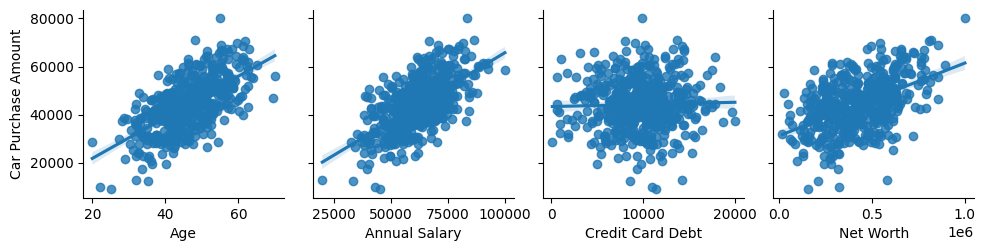

In [8]:
# prompt: 상관관계를 분석하기 위해, pairplot 을 그려보자.

sns.pairplot(df, x_vars=['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'], y_vars='Car Purchase Amount', kind='reg')
plt.show()


# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING




### NaN 값이 있으면, 이를 해결하시오.

In [10]:
# prompt: nan 이 컬럼당 몇개씩 있는지 확인해줘

df.isna().sum()


Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

### 학습을 위해 'Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount' 컬럼을 제외한 컬럼만, X로 만드시오.

In [12]:
df.head(1)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09301,11609.38091,238961.2505,35321.45877


In [13]:
# prompt: 학습을 위해 'Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount' 컬럼을 제외한 컬럼만, X로 저장해라

X = df[['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']]


In [15]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


### y 값은 'Car Purchase Amount' 컬럼으로 셋팅하시오.

In [11]:
# prompt: y 값은 'Car Purchase Amount' 컬럼으로 셋팅해줘

y = df['Car Purchase Amount']


In [ ]:
y =

### 피처 스케일링 하겠습니다. 정규화(normalization)를 사용합니다. MinMaxScaler 를 이용하시오.

In [16]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [17]:
# prompt: 민맥스 스케일러 사용할거야

from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)
X


array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

### 학습을 위해서, y 의 shape 을 변경하시오.

### y 도 피처 스케일링 하겠습니다. X 처럼 y도 노멀라이징 하시오.

In [18]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [19]:
# prompt: 민맥스 스케일러 만들어줘

scaler_y = MinMaxScaler()


In [26]:
y.values.shape

(500,)

In [27]:
y.values.reshape(500, 1)

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [30]:
y.values.reshape( -1 , 1)

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [32]:
y.to_frame()

,Car Purchase Amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248
...,...
495,48901.44342
496,31491.41457
497,64147.28888
498,45442.15353


In [34]:
y = scaler_y.fit_transform(  y.to_frame()  )

# STEP#4: TRAINING THE MODEL

### 트레이닝셋과 테스트셋으로 분리하시오. (테스트 사이즈는 25%로 하며, 동일 결과를 위해 랜덤스테이트는 50 으로 셋팅하시오.)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

### 아래 라이브러리를 임포트 하시오

In [36]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

### 딥러닝을 이용한 모델링을 하시오.

In [37]:
X_train

array([[1.        , 0.46353068, 0.467206  , 0.64213798, 0.36416975],
       [1.        , 0.48605956, 0.44258078, 0.47349631, 0.5135217 ],
       [1.        , 0.23792445, 0.50480432, 0.57378351, 0.58079638],
       ...,
       [1.        , 0.30675752, 0.52153758, 0.49312537, 0.27744633],
       [0.        , 0.61603869, 0.57308137, 0.4543552 , 0.52228606],
       [1.        , 0.50682579, 0.52553958, 0.24525971, 0.34452963]])

In [39]:
X_train.shape[1]

5

In [57]:
def build_model() :
  model = Sequential()
  model.add( Dense(10, 'relu', input_shape=(X_train.shape[1],)) )
  model.add( Dense(10, 'relu') )
  model.add( Dense(5, 'relu') )
  model.add( Dense(1, 'linear'))
  model.compile(optimizer= 'adam' , loss= 'mse', metrics=['mse', 'mae'] )
  return model

### 옵티마이저는 'adam' 으로 하고, 로스펑션은 'mean_squared_error' 로 셋팅하여 컴파일 하시오

In [58]:
model = build_model()

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 231 (924.00 Byte)
Trainable params: 231 (924.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습을 진행하시오.

In [62]:
model.fit(X_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.0982
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0811
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0665
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0547
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0483
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0403
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0337
Epoch 8/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0292
Epoch 9/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0244
Epoch 10/20
38/38 [==================

# STEP#5: EVALUATING THE MODEL

In [63]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.7073e-04 - mse: 2.7073e-04 - mae: 0.0098


[0.0002707296225707978, 0.0002707296225707978, 0.009760365821421146]

In [66]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [69]:
((y_test - y_pred)**2).mean()

0.00027072962882029416

### 테스트셋으로 예측을 해 보시오.

### 실제값과 예측값을 plot 으로 나타내시오.

### MSE 를 계산하시오.

### 새로운 고객 데이터가 있습니다. 이 사람은 차량을 얼마정도 구매 가능한지 예측하시오.

### 여자이고, 나이는 38, 연봉은 90000,  카드빚은 2000, 순자산은 500000 일때, 어느정도의 차량을 구매할 수 있을지 예측하시오.